In [56]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np

In [58]:
original_data=pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df=original_data.head(20000).copy()

In [59]:
# Setup: Import necessary libraries
import nltk
import spacy
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# NLTK imports
from nltk.tokenize import word_tokenize, sent_tokenize, TreebankWordTokenizer, WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [60]:
from nltk import pos_tag

In [61]:
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

True

In [62]:
lemmatizer=WordNetLemmatizer()

In [63]:
from nltk import pos_tag

def get_wordnet_pos(treebank_tag):
    """
    Convert Penn Treebank POS tags to WordNet POS tags.
    WordNet uses: 'n' (noun), 'v' (verb), 'a' (adjective), 'r' (adverb)
    """
    if treebank_tag.startswith('J'):
        return 'a'  # adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # verb
    elif treebank_tag.startswith('N'):
        return 'n'  # noun
    elif treebank_tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

In [64]:
def preprocess_text_pipeline(text,
                             lowercase=True,
                             remove_urls=True,
                             remove_mentions=True,
                             remove_hashtags=True,
                             remove_numbers=False,
                             remove_puntuation=True,
                             remove_stopwords=True,
                             stemming=False,
                             lemmatization=True,
                             use_pos_tagging=True
                             ):
  #Normalize Whitespace
  text=" ".join(text.split())

  if remove_urls:
    text=re.sub(r'https?://\S+|www\.\S+', '', text)

  #Remove mentions and hashtags
  if remove_mentions:
    text=re.sub(r"@w+", '', text)

  if remove_hashtags:
    text=re.sub(r'#w+', '', text)

  #Lowercase
  if lowercase:
    text=text.lower()

  #Tokenize
  tokens=word_tokenize(text)

  #Remove numbers
  if remove_numbers:
    tokens=[token for token in tokens if not token.isdigit()]

  #Remove Punctuation
  if remove_puntuation:
    tokens=[token for token in tokens if token.isalnum()]

  #Remove Stopwords
  if remove_stopwords:
    stop_words=set(stopwords.words('english'))
    tokens=[token for token in tokens if token not in stop_words and token not in '<br /><br />']

  #Stemming and Lemmatization
  if stemming:
    stemmer=PorterStemmer()
    tokens=[stemmer.stem(token) for token in tokens]
  elif lemmatization:
    if use_pos_tagging:
      pos_tags=pos_tag(tokens)
      tokens=[
          lemmatizer.lemmatize(word, get_wordnet_pos(pos))
          for word, pos in pos_tags
      ]
  else:
       #Simple Lemmatization
       tokens=[lemmatizer.lemmatize(token) for token in tokens]
  preprocessed_text=" ".join(tokens)

  return preprocessed_text


In [65]:
# Test the pipeline
test_text = """Hey @JohnDoe! Check out this AMAZING article on #NLP at
https://example.com. I'm studying Machine Learning and it's fascinating!
The researchers were running experiments with 1000+ datasets."""

print("ORIGINAL TEXT:")
print(test_text)
print("\n" + "="*80 + "\n")

# Apply preprocessing with different configurations
configs = [
    {"name": "Minimal (just lowercase + tokenize)",
     "params": {"remove_stopwords": False, "lemmatization": False}},

    {"name": "Standard (remove stopwords + lemmatize)",
     "params": {}},

    {"name": "Aggressive (everything + stemming)",
     "params": {"remove_numbers": True, "lemmatization": False, "stemming": True}},
]

for config in configs:
    result = preprocess_text_pipeline(test_text, **config["params"])
    print(f"{config['name']}:")
    print(f"  {result}")
    print()

ORIGINAL TEXT:
Hey @JohnDoe! Check out this AMAZING article on #NLP at
https://example.com. I'm studying Machine Learning and it's fascinating!
The researchers were running experiments with 1000+ datasets.


Minimal (just lowercase + tokenize):
  hey johndoe check out this amazing article on nlp at i studying machine learning and it fascinating the researcher were running experiment with datasets

Standard (remove stopwords + lemmatize):
  hey johndoe check amaze article nlp study machine learn fascinating researcher run experiment datasets

Aggressive (everything + stemming):
  hey johndo check amaz articl nlp studi machin learn fascin research run experi dataset



In [66]:
print(df.shape)

(20000, 2)


In [67]:
chunk_size =12500
print("\nOriginal Reviews:")
print("="*80+"\n")


for i in range(0, df.shape[0], chunk_size):
  chunk=df[i:i+chunk_size]
  for idx, row in chunk.iterrows():
    print(f"\n{idx+1}.[{row['sentiment'].upper()}]")
    print(f"    {row['review']}")


Streaming output truncated to the last 5000 lines.
18334.[NEGATIVE]
    My tolerance for shlocky direction was overwhelmed by some of the choices in this could-be-really-good time-waster.<br /><br />When the "romantic" intervals were of a nature to take me out of the story and into "How-and-why-did-the-movie-maker-do-/that/?" mode, you got to figure something is missing in there; restraint and tastefulness, I think.<br /><br />Brian Brown is a capable, empathetic actor - usually. I think he didn't like the project or the people, and it shows. I don't remember anything the other guy did. Can't even picture his face.<br /><br />On the other hand, it doesn't have to be any good to be entertaining; some of the vignettes and twists are fun and even ingenious.<br /><br />I watched this movie ($2.00 purchase at the vid rental place) against the advice of the screenwriter; I understand he was tempted to remove his name from the credits. Matter of pride, I bet.

18335.[NEGATIVE]
    Chuck Norri

In [68]:
#Apply Preprocessing pipeline
df['preprocessed']=df['review'].apply(lambda x:preprocess_text_pipeline(x, remove_numbers=True))

In [69]:
print(df.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        preprocessed  
0  one reviewer mention watch oz episode hook rig...  
1  wonderful little production film technique fas...  
2  think wonderful way spend time hot summer week...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


In [70]:
print("\nBefore and after preprocessing:")
print("="*80+"\n")

chunk_size=20000
for i in range(0, df.shape[0], chunk_size):
  chunk=df[i:i+chunk_size]
  for idx, row in chunk.iterrows():
    print(f"\nReview.{idx+1}:")
    print(f"Before:{row['review']}")
    print(f"After:{row['preprocessed']}")

Streaming output truncated to the last 5000 lines.

Review.18751:
Before:Having known and loved this book since I was eleven I was terrified to see it coming up as a movie - what if they'd made a dreadful mess of it? In the event I needn't have worried at all. Everyone was very well cast and the acting is terrific, it followed the story very well except for the strange addition of the scene in the prison, which to me added nothing at all. However it really is the most beautiful love story and I'm so glad I videoed it so I can watch it again and again. My only gripe is - why didn't they give Kester a green waistcoat 'which made him such a personable man'? Such a simple thing, when they went to so much trouble for everything else. If you get the chance, see this, it is excellent.
After:know love book since eleven terrify see come movie make dreadful mess event need worry everyone well cast act terrific follow story well except strange addition scene prison add nothing however really beau

In [71]:
#Analyze vocabulary reduction

original_tokens=[]

for review in df['review']:
  original_tokens.extend(word_tokenize(review.lower()))

preprocessed_tokens=[]

for review in df['preprocessed']:
  preprocessed_tokens.extend(review.split())

stats={
    'Original':{
        'Total Tokens':len(original_tokens),
        'Unique Tokens':len(set(original_tokens)),
        'Avg Tokens Per Review':len(original_tokens)/len(df)
    },
    'Preprocessed':{
        'Total Tokens':len(preprocessed_tokens),
        'Unique Tokens':len(set(preprocessed_tokens)),
        'Avg Tokens Per Review':len(preprocessed_tokens)/len(df)
    }
}

print("Vocabulary Statistics:")
print("="*60)
df_stats=pd.DataFrame(stats).T
print(df_stats)

print(f"\nReduction in unique tokens:{stats['Original']['Unique Tokens']-stats['Preprocessed']['Unique Tokens']}"
f"({(1-stats['Preprocessed']['Unique Tokens']/stats['Original']['Unique Tokens'])*100:.1f}%decrease)")

Vocabulary Statistics:
              Total Tokens  Unique Tokens  Avg Tokens Per Review
Original         5588415.0       100652.0              279.42075
Preprocessed     2266423.0        58589.0              113.32115

Reduction in unique tokens:42063(41.8%decrease)


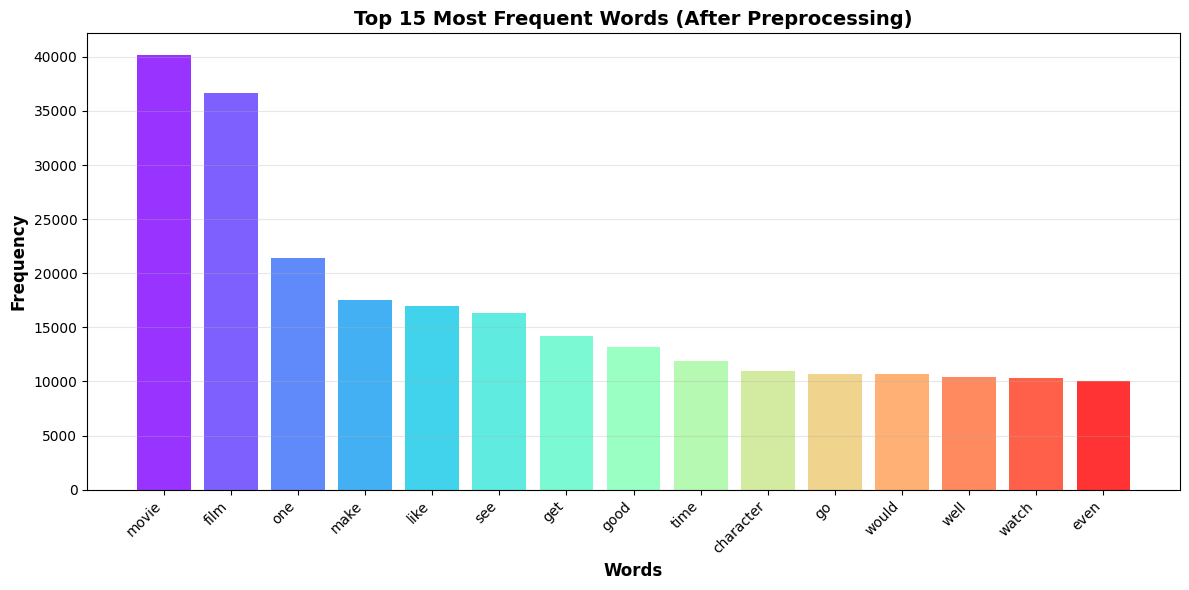


Most Common Words:
  movie: 40169
  film: 36693
  one: 21398
  make: 17517
  like: 16991
  see: 16332
  get: 14219
  good: 13210
  time: 11865
  character: 10990
  go: 10730
  would: 10730
  well: 10401
  watch: 10277
  even: 10052


In [72]:
# Visualize most common words

# Count word frequencies
word_freq = Counter(preprocessed_tokens)
most_common = word_freq.most_common(15)

# Create visualization
words, frequencies = zip(*most_common)
bars=15
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color=plt.cm.rainbow(np.linspace(0, 1, bars)), alpha=0.8)
plt.xlabel('Words', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Frequent Words (After Preprocessing)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMost Common Words:")
for word, freq in most_common:
    print(f"  {word}: {freq}")

**Feature Extraction**

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['preprocessed'])
feature_names=vectorizer.get_feature_names_out()

print(f"Vocabulary Size:{len(feature_names)} Unique words\n")
print(f"Vocabulary:{list(feature_names)}\n")

Vocabulary Size:58554 Unique words

Vocabulary:['00s', '06th', '08th', '0tt', '10', '100', '1000lb', '100b', '100bt', '100ibs', '100k', '100miles', '100mph', '100th', '100times', '100yards', '101st', '1040a', '1040s', '10am', '10ft', '10ish', '10k', '10pm', '10th', '10x', '10yrs', '1100ad', '110mph', '113min', '11m', '11th', '120kmph', '12a', '12hr', '12m', '12th', '12x', '12yrs', '13', '1300s', '135m', '13th', '14a', '14m', '14th', '14ème', '150th', '155ºf', '15ft', '15k', '15mins', '15pa', '15th', '1600s', '16k', '16mm', '16th', '16ème', '16éme', '1709s', '170x', '17million', '17th', '17yo', '1800s', '180d', '180s', '1840s', '1850ies', '1850s', '1860s', '1870s', '1880s', '188o', '1890s', '18a', '18th', '18year', '1900s', '1910s', '1920s', '1930s', '193o', '1940s', '1949er', '1950ies', '1950s', '1960s', '1970s', '197o', '1980ies', '1980s', '1980sness', '1984ish', '1990s', '1995s', '19k', '19th', '19thc', '1and', '1d', '1h', '1h30', '1h40m', '1h45', '1hour', '1hr', '1m', '1mln', '1o', 

In [75]:
#Convert to array for display
X_array=X.toarray()
feature_df=pd.DataFrame(X_array, columns=feature_names)
print("\nFeature Matrix")
print("Each row is a review, each column is a word, values are word counts")
print("=" * 80)
feature_df


Feature Matrix
Each row is a review, each column is a word, values are word counts


00s  06th  08th  0tt  10  100  1000lb  100b  100bt  100ibs  ...  ís  \
0        0     0     0    0   0    0       0     0      0       0  ...   0   
1        0     0     0    0   0    0       0     0      0       0  ...   0   
2        0     0     0    0   0    0       0     0      0       0  ...   0   
3        0     0     0    0   0    0       0     0      0       0  ...   0   
4        0     0     0    0   0    0       0     0      0       0  ...   0   
...    ...   ...   ...  ...  ..  ...     ...   ...    ...     ...  ...  ..   
19995    0     0     0    0   0    0       0     0      0       0  ...   0   
19996    0     0     0    0   0    0       0     0      0       0  ...   0   
19997    0     0     0    0   0    0       0     0      0       0  ...   0   
19998    0     0     0    0   0    0       0     0      0       0  ...   0   
19999    0     0     0    0   0    0       0     0      0       0  ...   0   

       ísnt  ïn  óli  önsjön  über  überwoman  ünfaithful  üvegtigris  üzümcü  
0         0   0    0       0     0          0           0           0       0  
1         0   0    0       0     0          0           0           0       0  
2         0   0    0       0     0          0           0           0       0  
3         0   0    0       0     0          0           0           0       0  
4         0   0    0       0     0          0           0           0       0  
...     ...  ..  ...     ...   ...        ...         ...         ...     ...  
19995     0   0    0       0     0          0           0           0       0  
19996     0   0    0       0     0          0           0           0       0  
19997     0   0    0       0     0          0           0           0       0  
19998     0   0    0       0     0          0           0           0       0  
19999     0   0    0       0     0          0           0           0       0  

[20000 rows x 58554 columns]

#Model Training

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, confusion_matrix, classification_report
)

In [87]:
X_train, X_test, y_train, y_test=train_test_split(df['preprocessed'], df['sentiment'].apply(lambda x:1 if x=='positive' else 0), test_size=0.3, random_state=42, stratify=df['sentiment'])
print(f"Training set: {len(X_train)} reviews")
print(f"Test set: {len(X_test)} reviews\n")


vectorizer=CountVectorizer()
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

#Train Classifier
clf_NB=MultinomialNB()
clf_NB.fit(X_train_vec, y_train)

#Predict
y_train_pred=clf_NB.predict(X_train_vec)
y_test_pred=clf_NB.predict(X_test_vec)

Training set: 14000 reviews
Test set: 6000 reviews



#Compute Metrics

In [84]:
def compute_metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "confusion_matrix": confusion_matrix(y_true, y_pred),
        "ROC-AUC Score" : roc_auc_score(y_true, y_pred),
        "classification_report": classification_report(y_true, y_pred, output_dict=True)
    }

In [88]:
metrics_test = compute_metrics(y_test, y_test_pred)
print("TEST metrics:")
for k,v in metrics_test.items():
    if k not in ("confusion_matrix", "classification_report"):
        print(f"  {k}: {v:.4f}")

TEST metrics:
  accuracy: 0.8500
  precision: 0.8640
  recall: 0.8273
  f1: 0.8453
  ROC-AUC Score: 0.8498


In [89]:
test_cr = pd.DataFrame(metrics_test["classification_report"]).T
print("Test classification report:\n", test_cr)

Test classification report:
               precision    recall  f1-score  support
0              0.837401  0.872235  0.854463  3029.00
1              0.863972  0.827331  0.845254  2971.00
accuracy       0.850000  0.850000  0.850000     0.85
macro avg      0.850686  0.849783  0.849859  6000.00
weighted avg   0.850558  0.850000  0.849903  6000.00


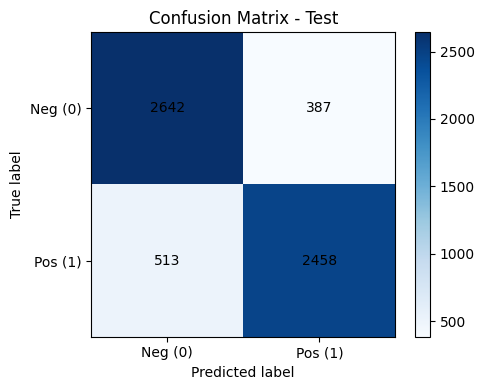

In [90]:
#Confusion Matrix
cm_test = metrics_test["confusion_matrix"]
plt.figure(figsize=(5,4))
plt.imshow(cm_test, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.colorbar()
plt.xticks([0,1], ["Neg (0)", "Pos (1)"])
plt.yticks([0,1], ["Neg (0)", "Pos (1)"])
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, cm_test[i,j], ha="center", va="center")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

#Model Test

In [91]:
new_reviews = [
    "This is an excellent movie with great performances!",
    "Awful experience, very disappointing.",
    "Absolutely loved it, highly recommended!"
]

In [107]:
print("\nTesting with new reviews:")
print("="*60)
for review in new_reviews:
  cleaned=preprocess_text_pipeline(review, remove_numbers=True)
  features=vectorizer.transform([cleaned])
  prediction=clf_NB.predict(features)[0]
  probability = clf_NB.predict_proba(features)[0]
  sentiment = "positive" if prediction == 1 else "negative"
  confidence = max(probability) * 100
  print(f"\nReview: {review}")
  print(f"Cleaned: {cleaned}")
  print(f"Prediction: {sentiment} (Confidence: {confidence:.2f}%)")
  print("-" * 80)



Testing with new reviews:

Review: This is an excellent movie with great performances!
Cleaned: excellent movie great performance
Prediction: positive (Confidence: 93.84%)
--------------------------------------------------------------------------------

Review: Awful experience, very disappointing.
Cleaned: awful experience disappointing
Prediction: negative (Confidence: 95.86%)
--------------------------------------------------------------------------------

Review: Absolutely loved it, highly recommended!
Cleaned: absolutely love highly recommended
Prediction: positive (Confidence: 93.88%)
--------------------------------------------------------------------------------
